попытка построить коридор разбитый на части поопорно

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import split
from descartes import PolygonPatch

In [2]:
%matplotlib inline

In [3]:
c = [(0, 0), (1, 1), (3, 2), (3, 4), (5, 6), (6, 3)]

In [4]:
line = LineString(c)

In [5]:
line.length

11.640986324787455

In [9]:
koridor_full = line.buffer(0.5)
type(koridor_full)

shapely.geometry.polygon.Polygon

In [79]:
Point(line.coords[1]).within(koridor_full)

True

In [91]:
mid_points = []
str_boxes = []
kor_spam = koridor_full

for i in range(len(line.coords)-1):
    mp = LineString([line.coords[i], line.coords[i+1]]).interpolate(0.5, normalized = True)   # mid point
    mid_points.append(mp)
    spam = LineString([line.coords[i], mp])       # line from str to mid 
    left = spam.parallel_offset(0.6, 'left')      # left parallel line
    right = spam.parallel_offset(0.6, 'right')    # right parallel line
    xline = LineString([left.boundary[1], right.boundary[0]])    # x-line - connect ends of parallels
    
    cut = split(kor_spam, xline)
    if Point(line.coords[i]).within(cut[0]):
        str_boxes.append(cut[0])
        kor_spam = cut[1]
    else:
        str_boxes.append(cut[1])
        kor_spam = cut[0]
        
str_boxes.append(kor_spam)

<AxesSubplot:>

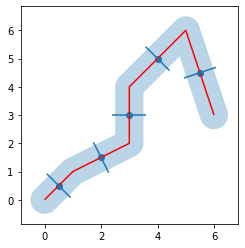

In [106]:
ax = gpd.GeoSeries(line).plot(color='red')
gpd.GeoSeries(koridor_full).plot(ax=ax, alpha=0.3)
gpd.GeoSeries(mid_points).plot(ax=ax)
gpd.GeoSeries(x_lines).plot(ax=ax)


<AxesSubplot:>

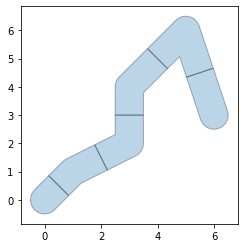

In [105]:
gpd.GeoSeries(str_boxes).plot(edgecolor='black', alpha=0.3)